# Linear Regression 

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables)
 
The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data  = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')
train_data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


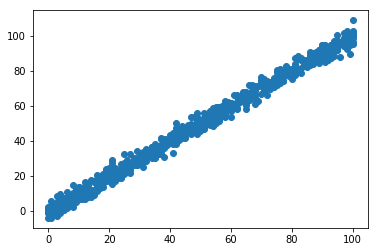

In [3]:
plt.scatter(x=train_data['x'] , y= train_data['y'])

[0 1] 
One null value present in second column of training data
[0 0] 
zero null value present 


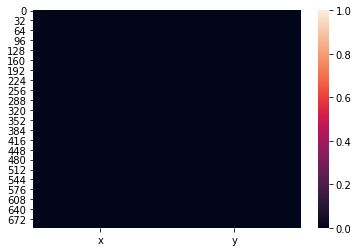

In [4]:
sns.heatmap((train_data.isnull())) 
print(np.array(train_data.isnull().sum()) , "\nOne null value present in second column of training data")
print(np.array(test_data.isnull().sum()) , "\nzero null value present ")


$$
h_{\theta}(x)=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}
$$

$$
h(x)=\sum_{i=0}^{n} \theta_{i} x_{i}=\theta^{T} x
$$

The Cost function is: 
$$
J(\theta)=\frac{1}{2} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}
$$

Now we have to minimize this cost function

for gradient decent we have a formula :

$$
\theta_{j} :=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$

$$
\begin{aligned} \frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{2}\left(h_{\theta}(x)-y\right)^{2} \\ &=2 \cdot \frac{1}{2}\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(h_{\theta}(x)-y\right) \\ &=\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(\sum_{i=0}^{n} \theta_{i} x_{i}-y\right) \\ &=\left(h_{\theta}(x)-y\right) x_{j} \end{aligned}
$$

### Deleting null value

In [5]:
for i in np.where(train_data['y'].isnull()):
    print(i)
    train_data.drop(i,axis=0 , inplace=True)

[213]


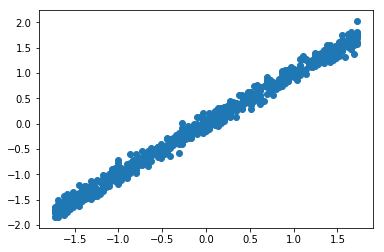

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
train_data
plt.scatter(x=train_data[:,0] , y = train_data[:,1])

In [7]:
train_data = np.array(train_data)
test_data = np.array(test_data)

# Using Gradient Decent 

In [8]:
initial_theta  = 0
initial_theta0 = 0
alpha = 0.1
epsilon = 0.0001

def y_cap(theta0 , theta , data):
    return theta0 + np.dot(np.array(data[:,0]),theta)

while(True):

    del_theta0 = (1/train_data.shape[0]) * np.sum((y_cap(initial_theta0 ,initial_theta , train_data) - (train_data[:,1])))
    del_theta = (1/train_data.shape[0]) * np.dot((y_cap(initial_theta0 ,initial_theta, train_data) - (train_data[:,1])) , 
                                 (train_data[:,0]))

    final_theta0 = initial_theta0 - alpha * del_theta0
    final_theta  = initial_theta  - alpha * del_theta

    initial_cost =  -(1/2) * np.sum((y_cap(initial_theta , initial_theta0,train_data) - (train_data[:,1])) **2 )
    final_cost  =  -(1/2) * np.sum((y_cap(final_theta , final_theta0, train_data) - (train_data[:,1])) **2 )

    if(abs(initial_cost - final_cost)) < epsilon:
            break
        
    print("initial cost {} final cost {}".format(initial_cost , final_cost))
    initial_theta0 = final_theta0
    initial_theta = final_theta

initial cost -349.5 final cost -352.96250185399947
initial cost -352.96250185399947 final cost -361.99963169293795
initial cost -361.99963169293795 final cost -374.92895986595715
initial cost -374.92895986595715 final cost -390.45004338923394
initial cost -390.45004338923394 final cost -407.56561597590616
initial cost -407.56561597590616 final cost -425.51837521064687
initial cost -425.51837521064687 final cost -443.7403410863694
initial cost -443.7403410863694 final cost -461.8123412517291
initial cost -461.8123412517291 final cost -479.4316484110924
initial cost -479.4316484110924 final cost -496.3861755330563
initial cost -496.3861755330563 final cost -512.5339419924389
initial cost -512.5339419924389 final cost -527.7867723660713
initial cost -527.7867723660713 final cost -542.0973905560929
initial cost -542.0973905560929 final cost -555.4492343186517
initial cost -555.4492343186517 final cost -567.8484464921017
initial cost -567.8484464921017 final cost -579.3176052057956
initial 

# Ok, Now we have intercept as well as coeffcient ( Slope )

In [9]:
print("Slope : " ,final_theta)
print('intercept : %.20f'%final_theta0)

Slope :  0.9953386624753112
intercept : -0.00000000000000026722


In [10]:
def rs_quare(data):
    deno = np.sum(( data[:,1] - np.mean(data[:,1]) )** 2)
    num = np.sum(( y_cap(final_theta ,final_theta0, data) - np.mean(data[:,1])) ** 2)
    r2 = num / deno
    #rss = np.sum(( data[:,1]  - y_cap(final_theta , final_theta0 , data) )** 2)
    #tss = np.sum(( data[:,1] - np.mean(data[:,1]) )** 2)
    #r2 = ( (tss - rss) / tss)
    return r2

def rs_error(data):
    rss = np.sqrt(np.sum(( data[:,1]  - y_cap(final_theta , final_theta0 , data) )** 2) / (data.shape[0] - 2) )
    return rss

def mse(data):
    return  np.sum(( data[:,1]  - y_cap(final_theta , final_theta0,data) )** 2) / data.shape[0]
    
print("R2 : ",rs_quare(train_data))
print('Residual Sum of Square Error : ',rs_error(train_data))
print("Mean square error :", mse(train_data))

R2 :  0.9906990530181421
Residual Sum of Square Error :  1.4129441763292652
Mean square error : 1.9906990530181423


# Now we plot a line with training data 

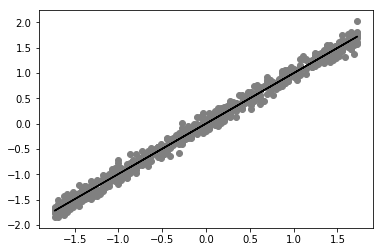

In [11]:
plt.scatter(train_data[:,0],train_data[:,1],c = ['grey'])
plot_x = train_data[:,0] 
plot_y = final_theta0 + final_theta * train_data[:,0]
plt.plot(plot_x, plot_y,c = 'black')
plt.show()


# Plot with a testing data 

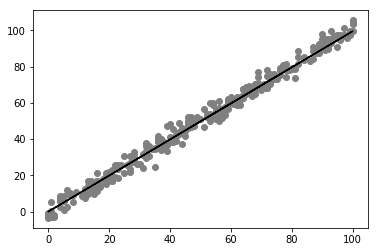

In [12]:
plt.scatter(test_data[:,0],test_data[:,1],c = ['grey'])
plot_x = test_data[:,0] 
plot_y = final_theta0 + final_theta * test_data[:,0]
plt.plot(plot_x, plot_y,c = 'black')
plt.show()

# Perfect! Note this we dont normalize the testing data but it still give us good fit line

# I think best way to check our output is check with sklearn library output

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(train_data[:,0].reshape(699,1), train_data[:,1])
diabetes_y_pred = regr.predict(np.array(test_data[:,0]).reshape(300,1))

print('Coefficients : ', list(regr.coef_)[0])
print('Intercept : %.20f'% regr.intercept_)
print("Mean squared error : %.10f"% mean_squared_error( np.array(test_data[:,1]) , diabetes_y_pred ) )
print('Variance score : %.10f' % r2_score( np.array(test_data[:,1]) , diabetes_y_pred ))


Coefficients :  0.9953399077212521
Intercept : -0.00000000000000023392
Mean squared error : 9.7122676345
Variance score : 0.9884698117


In [14]:
print("Predicted Slope : " ,final_theta)
print('Predicted Intercept : %.20f'%final_theta0)
print("Variance Score : ",rs_quare(train_data))

Predicted Slope :  0.9953386624753112
Predicted Intercept : -0.00000000000000026722
Variance Score :  0.9906990530181421


# !!!!Splash!!!!###